In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from config import weather_api_key

In [2]:
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92b6ff825b4005ab25ff58d0684485e4


In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if i % 50 == 0 and i >=0:
        set_count += 1
        record_count += 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 2 of Set 2 | georgetown
Processing Record 3 of Set 2 | longyearbyen
Processing Record 4 of Set 2 | castro
Processing Record 5 of Set 2 | acapulco
Processing Record 6 of Set 2 | hermanus
Processing Record 7 of Set 2 | bluff
Processing Record 8 of Set 2 | new norfolk
Processing Record 9 of Set 2 | hilo
Processing Record 10 of Set 2 | khatanga
Processing Record 11 of Set 2 | bengkulu
Processing Record 12 of Set 2 | mahibadhoo
Processing Record 13 of Set 2 | kapaa
Processing Record 14 of Set 2 | tasiilaq
Processing Record 15 of Set 2 | kurbnesh
Processing Record 16 of Set 2 | arraial do cabo
Processing Record 17 of Set 2 | tuktoyaktuk
Processing Record 18 of Set 2 | vao
Processing Record 19 of Set 2 | wenling
Processing Record 20 of Set 2 | ribeira grande
Processing Record 21 of Set 2 | grand gaube
Processing Record 22 of Set 2 | chara
Processing Record 23 of Set 2 | bodden town
Processing Record 24 of Set 2 | us

Processing Record 187 of Set 5 | san quintin
Processing Record 188 of Set 5 | ponta do sol
Processing Record 189 of Set 5 | port elizabeth
Processing Record 190 of Set 5 | leningradskiy
Processing Record 191 of Set 5 | aswan
Processing Record 192 of Set 5 | lixourion
Processing Record 193 of Set 5 | dunedin
Processing Record 194 of Set 5 | centralia
Processing Record 195 of Set 5 | sangmelima
Processing Record 196 of Set 5 | yaounde
Processing Record 197 of Set 5 | galle
Processing Record 198 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 199 of Set 5 | diapaga
Processing Record 200 of Set 5 | fort nelson
Processing Record 201 of Set 5 | upernavik
Processing Record 202 of Set 5 | monrovia
Processing Record 203 of Set 5 | bay roberts
Processing Record 204 of Set 5 | maple creek
Processing Record 206 of Set 6 | gallipoli
Processing Record 207 of Set 6 | umm durman
City not found. Skipping...
Processing Record 208 of Set 6 | opuwo
Processing Record 209 of Set 6 | mwek

Processing Record 374 of Set 9 | te anau
Processing Record 375 of Set 9 | artyk
City not found. Skipping...
Processing Record 376 of Set 9 | bonfim
Processing Record 377 of Set 9 | amelia
Processing Record 378 of Set 9 | ostrovnoy
Processing Record 379 of Set 9 | imbituba
Processing Record 380 of Set 9 | launceston
Processing Record 381 of Set 9 | honningsvag
Processing Record 382 of Set 9 | zhigansk
Processing Record 383 of Set 9 | tumannyy
City not found. Skipping...
Processing Record 384 of Set 9 | gat
Processing Record 385 of Set 9 | severo-yeniseyskiy
Processing Record 386 of Set 9 | esna
Processing Record 387 of Set 9 | gloucester
Processing Record 388 of Set 9 | luganville
Processing Record 389 of Set 9 | hobbs
Processing Record 390 of Set 9 | puerto baquerizo moreno
Processing Record 391 of Set 9 | isla vista
Processing Record 392 of Set 9 | wilmington
Processing Record 393 of Set 9 | constantine
Processing Record 394 of Set 9 | iqaluit
Processing Record 395 of Set 9 | saryagas

Processing Record 558 of Set 12 | lesogorskiy
Processing Record 559 of Set 12 | lengshuitan
Processing Record 560 of Set 12 | balykshi
City not found. Skipping...
Processing Record 561 of Set 12 | placido de castro
Processing Record 563 of Set 13 | codrington
Processing Record 564 of Set 13 | msanga
Processing Record 565 of Set 13 | coromandel
Processing Record 566 of Set 13 | constitucion
Processing Record 567 of Set 13 | salmas
Processing Record 568 of Set 13 | kaliua
Processing Record 569 of Set 13 | aykhal
Processing Record 570 of Set 13 | orlik
Processing Record 571 of Set 13 | college
Processing Record 572 of Set 13 | xining
Processing Record 573 of Set 13 | morgan city
Processing Record 574 of Set 13 | adet
Processing Record 575 of Set 13 | kualakapuas
Processing Record 576 of Set 13 | corby
Processing Record 577 of Set 13 | barentu
Processing Record 578 of Set 13 | port antonio
Processing Record 579 of Set 13 | khvatovka
Processing Record 580 of Set 13 | balkhash
Processing Rec

In [8]:
len(city_data)

569

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.41,100.34,80.60,83,20,13.87,MY,2020-08-22 12:46:56
1,Longyearbyen,78.22,15.64,46.40,61,40,4.70,SJ,2020-08-22 12:48:00
2,Castro,-24.79,-50.01,44.58,83,85,7.63,BR,2020-08-22 12:48:35
3,Acapulco,16.86,-99.89,78.80,88,90,10.29,MX,2020-08-22 12:47:37
4,Hermanus,-34.42,19.23,64.00,73,0,3.00,ZA,2020-08-22 12:46:44
5,Bluff,-46.60,168.33,46.56,89,43,5.30,NZ,2020-08-22 12:46:44
6,New Norfolk,-42.78,147.06,44.01,91,100,3.00,AU,2020-08-22 12:48:36
7,Hilo,19.73,-155.09,75.20,88,90,10.29,US,2020-08-22 12:48:36
8,Khatanga,71.97,102.50,56.75,64,0,7.94,RU,2020-08-22 12:48:36
9,Bengkulu,-3.80,102.27,79.59,85,100,5.79,ID,2020-08-22 12:48:36


In [10]:
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp",
                    "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2020-08-22 12:46:56,5.41,100.34,80.60,83,20,13.87
1,Longyearbyen,SJ,2020-08-22 12:48:00,78.22,15.64,46.40,61,40,4.70
2,Castro,BR,2020-08-22 12:48:35,-24.79,-50.01,44.58,83,85,7.63
3,Acapulco,MX,2020-08-22 12:47:37,16.86,-99.89,78.80,88,90,10.29
4,Hermanus,ZA,2020-08-22 12:46:44,-34.42,19.23,64.00,73,0,3.00
5,Bluff,NZ,2020-08-22 12:46:44,-46.60,168.33,46.56,89,43,5.30
6,New Norfolk,AU,2020-08-22 12:48:36,-42.78,147.06,44.01,91,100,3.00
7,Hilo,US,2020-08-22 12:48:36,19.73,-155.09,75.20,88,90,10.29
8,Khatanga,RU,2020-08-22 12:48:36,71.97,102.50,56.75,64,0,7.94
9,Bengkulu,ID,2020-08-22 12:48:36,-3.80,102.27,79.59,85,100,5.79


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a csv.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

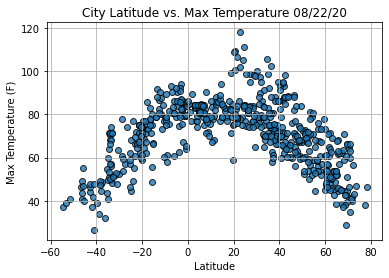

In [15]:
# Import the time module.
import time

# Build the scatterplot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolors="k", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

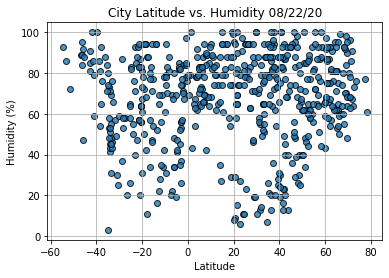

In [17]:
# Build the scatterplot for latitude vs. max temperature.
plt.scatter(lats,
           humidity,
           edgecolors="k", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

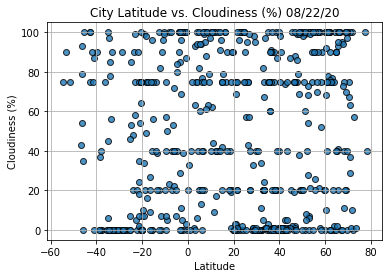

In [18]:
# Build the scatterplot for latitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
           edgecolors="k", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

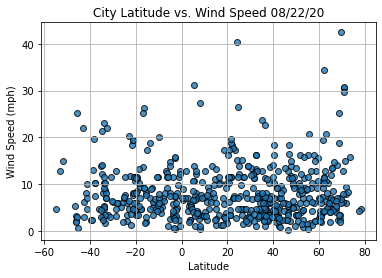

In [19]:
# Build the scatterplot for latitude vs. max temperature.
plt.scatter(lats,
           wind_speed,
           edgecolors="k", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()